In [90]:
import matplotlib.pyplot as plt
from Objects.Simulation import Simulation
import numpy as np
%pylab
%matplotlib inline

from matplotlib import lines, markers
from cycler import cycler

# Create cycler object. Use any styling from above you please
monochromeWithMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [ '.' ,'^']))
monochromeNoMarker = (cycler('color', ['k']) * cycler('linestyle', ['-', '--', ':', '-.']) * cycler('marker', [',']))
monochrome = monochromeNoMarker.concat(monochromeWithMarker)

plt.set_cmap('gray')
# Overriding styles for current script
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.bottom'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['figure.figsize'] = (12,5)
mpl.rcParams['figure.dpi']= 300
plt.rcParams['axes.prop_cycle'] = monochrome


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


<Figure size 432x288 with 0 Axes>

In [91]:
def cal_one_p(p):
    return np.mean(p.delays), np.max(p.delays), p.vehPass

def cal_vdr(ps, tg):
    if type(ps) is not list:
        ps = [ps]
    total_vehPass = 0
    total_tg = 0
    for p in ps:
        total_vehPass += p.vehPass
        total_tg += tg
    return total_vehPass / total_tg * 3600

def map_platoon_hpass0(p):
    return list(map(lambda car: car.headway_pass_zero,p.platoon))

In [92]:
simulation_time = 200 # seconds
n = 200 # number of vehicles
intended_speed = 80 * 1000/3600 # intended speed / speed limit of the road
sim = Simulation(time = simulation_time, avStep = 100)


LRT = [1.34, -1.34]
HSR = [0.58, -0.54]

human_profile = [1.7, -2.0]
av_profile = LRT
HUMAN_T = 1.80

paras={
    'v_intend': intended_speed,
    'human_max_acc': human_profile[0],
    'human_max_dec': human_profile[1],
    'max_acc': av_profile[0],
    'max_dec': av_profile[1],
    'tsys': 0.5,
    'human_T': HUMAN_T,
    'AV_T': 1.0
}


# cav1 = sim.run_cav_simulation(n, paras)

# av1 = sim.run_av_simulation(n, paras)

human1 = sim.run_human_simulation(n, paras)

In [93]:
print("Scenario 1")

print("Average delay is {}, the highest delay is {}, vehicle pass number is {}, VDR is {}".format(*cal_one_p(human1), cal_vdr(human1, simulation_time)))

def get_saturation_flow(p):
    start = p.vehPass//2
    start_veh = p.platoon[start].time_pass_zero
    last_veh = p.platoon[p.vehPass-1].time_pass_zero
    t_dif = (last_veh-start_veh)/1000
    return (p.vehPass - start)/t_dif * 3600


x_human_T = []
y_saturation_flow = []
y_vdr = []

for i in range(21):
    start_T = 1.6
    cur_T = start_T + i * 0.02
    paras['human_T'] = cur_T
    p = sim.run_human_simulation(n, paras)
    cur_vdr = cal_vdr(p, simulation_time)
    cur_flow = get_saturation_flow(p)
    x_human_T.append(cur_T)
    y_saturation_flow.append(cur_flow)
    y_vdr.append(cur_vdr)


Scenario 1
Average delay is 20.792865741660233, the highest delay is 40.503738541253185, vehicle pass number is 103, VDR is 1854.0


In [94]:
print(y_saturation_flow[0], y_saturation_flow[-1])

idx = x_human_T.index(1.8)
y_saturation_flow[idx], y_vdr[idx]

2117.6470588235293 1728.29417773238


(1900.5076142131982, 1854.0)

1900.5076142131982


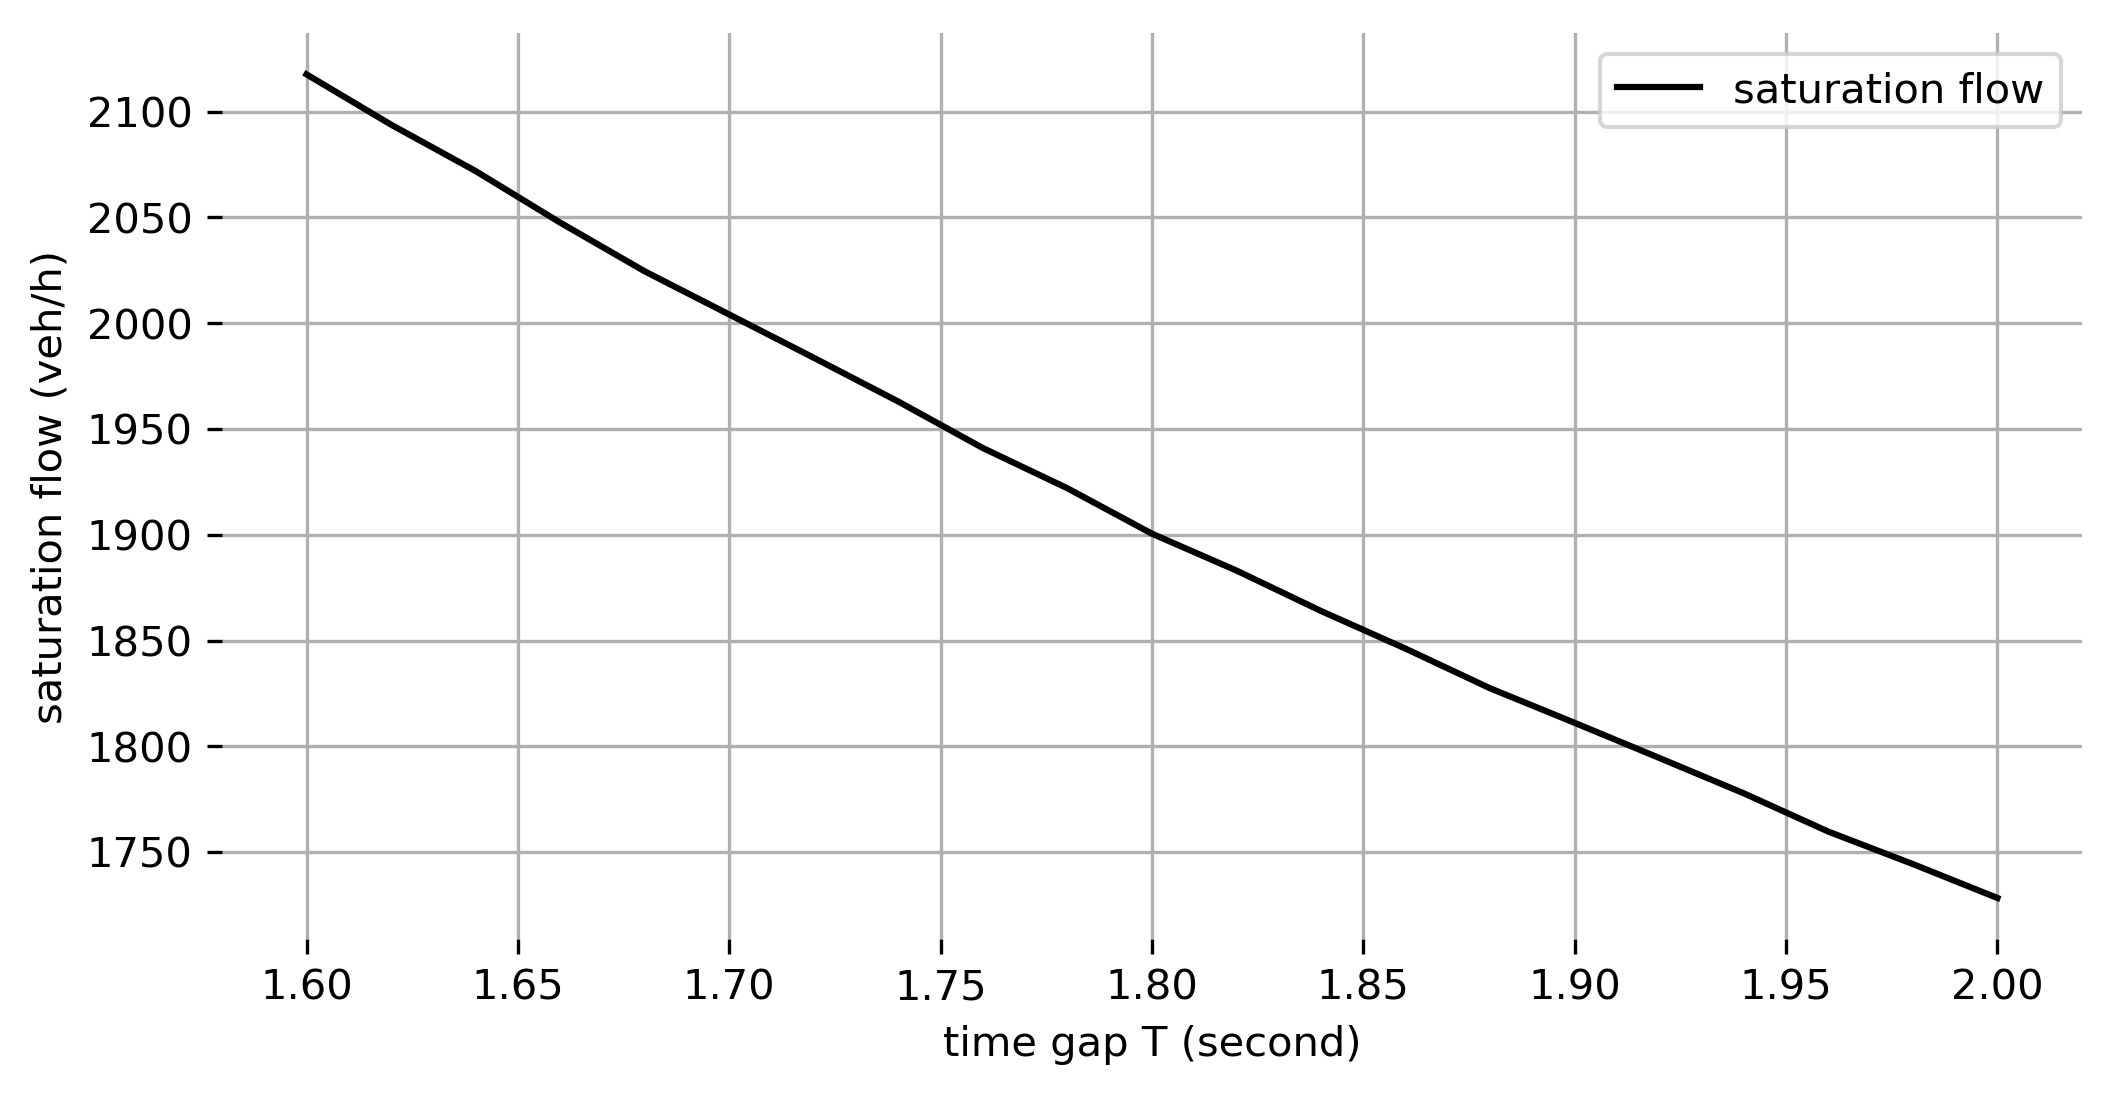

In [95]:
plt.figure(figsize=(8,4))
plt.xlabel("time gap T (second)")
plt.ylabel("saturation flow (veh/h)")
plt.plot(x_human_T, y_saturation_flow, label = "saturation flow")
plt.legend(title="")
print(get_saturation_flow(human1))


In [96]:
simulation_time = 60 # seconds
n = 100 # number of vehicles
intended_speed = 80 * 1000/3600 # intended speed / speed limit of the road
sim = Simulation(time = simulation_time, avStep = 100)


LRT = [1.34, -1.34]
HSR = [0.58, -0.54]

human_profile = [1.7, -2.0]
av_profile = LRT
HUMAN_T = 1.80

paras={
    'v_intend': intended_speed,
    'human_max_acc': human_profile[0],
    'human_max_dec': human_profile[1],
    'max_acc': av_profile[0],
    'max_dec': av_profile[1],
    'tsys': 1.0,
    'human_T': HUMAN_T,
    'AV_T': 1.6
}


cav = sim.run_cav_simulation(n, paras)

av = sim.run_av_simulation(n, paras)

# human1 = sim.run_human_simulation(n, paras)
print("Average delay of AV is {}, the highest delay is {}, vehicle pass number is {}, VDR is {}".format(*cal_one_p(av), cal_vdr(av, simulation_time)))
print("Average delay of CAV is {}, the highest delay is {}, vehicle pass number is {}, VDR is {}".format(*cal_one_p(cav), cal_vdr(cav, simulation_time)))


Average delay of AV is 21.130829949320667, the highest delay is 39.317824094280425, vehicle pass number is 33, VDR is 1980.0000000000002
Average delay of CAV is 9.26908292616276, the highest delay is 17.68164668920397, vehicle pass number is 53, VDR is 3180.0


In [97]:
x_T_av = []
y_vdr_av = []
y_avg_delay_av = []
y_high_delay_av = []
y_veh_pass_num_av = []

start_T = 0.5
end_T = 1.4
totalLoop = int((end_T - start_T-0.0001) / 0.02 + 1) + 1
print(totalLoop)
for i in range(totalLoop):
    cur_T = start_T + i * 0.02
    paras['AV_T'] = cur_T
    p = sim.run_av_simulation(n, paras)
    cur_vdr = cal_vdr(p, simulation_time)
    avg_delay, max_delay, psn = cal_one_p(p)
    x_T_av.append(cur_T)
    y_vdr_av.append(cur_vdr)
    y_avg_delay_av.append(avg_delay)
    y_high_delay_av.append(max_delay)
    y_veh_pass_num_av.append(psn)


46


In [98]:
def printMaxMin(*arrays):
    for ary in arrays:
        print(np.min(ary), np.max(ary))
        
printMaxMin(y_vdr_av,y_veh_pass_num_av, y_avg_delay_av, y_high_delay_av)
(59.83921810565134 - 59.78145663869108)/59.78145663869108

2160.0 5340.0
36 89
14.945343696701253 20.29024543421982
23.701343989503687 37.184445351556754


0.0009662104305915233

In [99]:
simulation_time = 60 # seconds
n = 100 # number of vehicles
intended_speed = 80 * 1000/3600 # intended speed / speed limit of the road
sim = Simulation(time = simulation_time, avStep = 100)


LRT = [1.34, -1.34]
HSR = [0.58, -0.54]

human_profile = [1.7, -2.0]
av_profile = LRT
HUMAN_T = 1.80

paras={
    'v_intend': intended_speed,
    'human_max_acc': human_profile[0],
    'human_max_dec': human_profile[1],
    'max_acc': av_profile[0],
    'max_dec': av_profile[1],
    'tsys': 1.0,
    'human_T': HUMAN_T,
    'AV_T': 1.4
}


cav = sim.run_cav_simulation(n, paras)

av = sim.run_av_simulation(n, paras)

# human1 = sim.run_human_simulation(n, paras)
print("Average delay of AV is {}, the highest delay is {}, vehicle pass number is {}, VDR is {}".format(*cal_one_p(av), cal_vdr(av, simulation_time)))
print("Average delay of CAV is {}, the highest delay is {}, vehicle pass number is {}, VDR is {}".format(*cal_one_p(cav), cal_vdr(cav, simulation_time)))


Average delay of AV is 20.09002702655103, the highest delay is 36.781189299914516, vehicle pass number is 36, VDR is 2160.0
Average delay of CAV is 9.26908292616276, the highest delay is 17.68164668920397, vehicle pass number is 53, VDR is 3180.0


In [100]:
x_T_cav = []
y_vdr_cav = []
y_avg_delay_cav = []
y_high_delay_cav = []
y_veh_pass_num_cav = []

start_T = 0.5
end_T = 1.4
totalLoop = int((end_T - start_T-0.0001) / 0.02 + 1) + 1
print(totalLoop)
for i in range(totalLoop):
    cur_T = start_T + i * 0.02
    paras['tsys'] = cur_T
    p = sim.run_cav_simulation(n, paras)
    cur_vdr = cal_vdr(p, simulation_time)
    avg_delay, max_delay, psn = cal_one_p(p)
    x_T_cav.append(cur_T)
    y_vdr_cav.append(cur_vdr)
    y_avg_delay_cav.append(avg_delay)
    y_high_delay_cav.append(max_delay)
    y_veh_pass_num_cav.append(psn)

46


In [101]:
y_vdr_av[0],y_vdr_av[-1], y_avg_delay_av[0],  y_avg_delay_av[-1]

(5340.0, 2160.0, 14.945343696701253, 20.09002702655103)

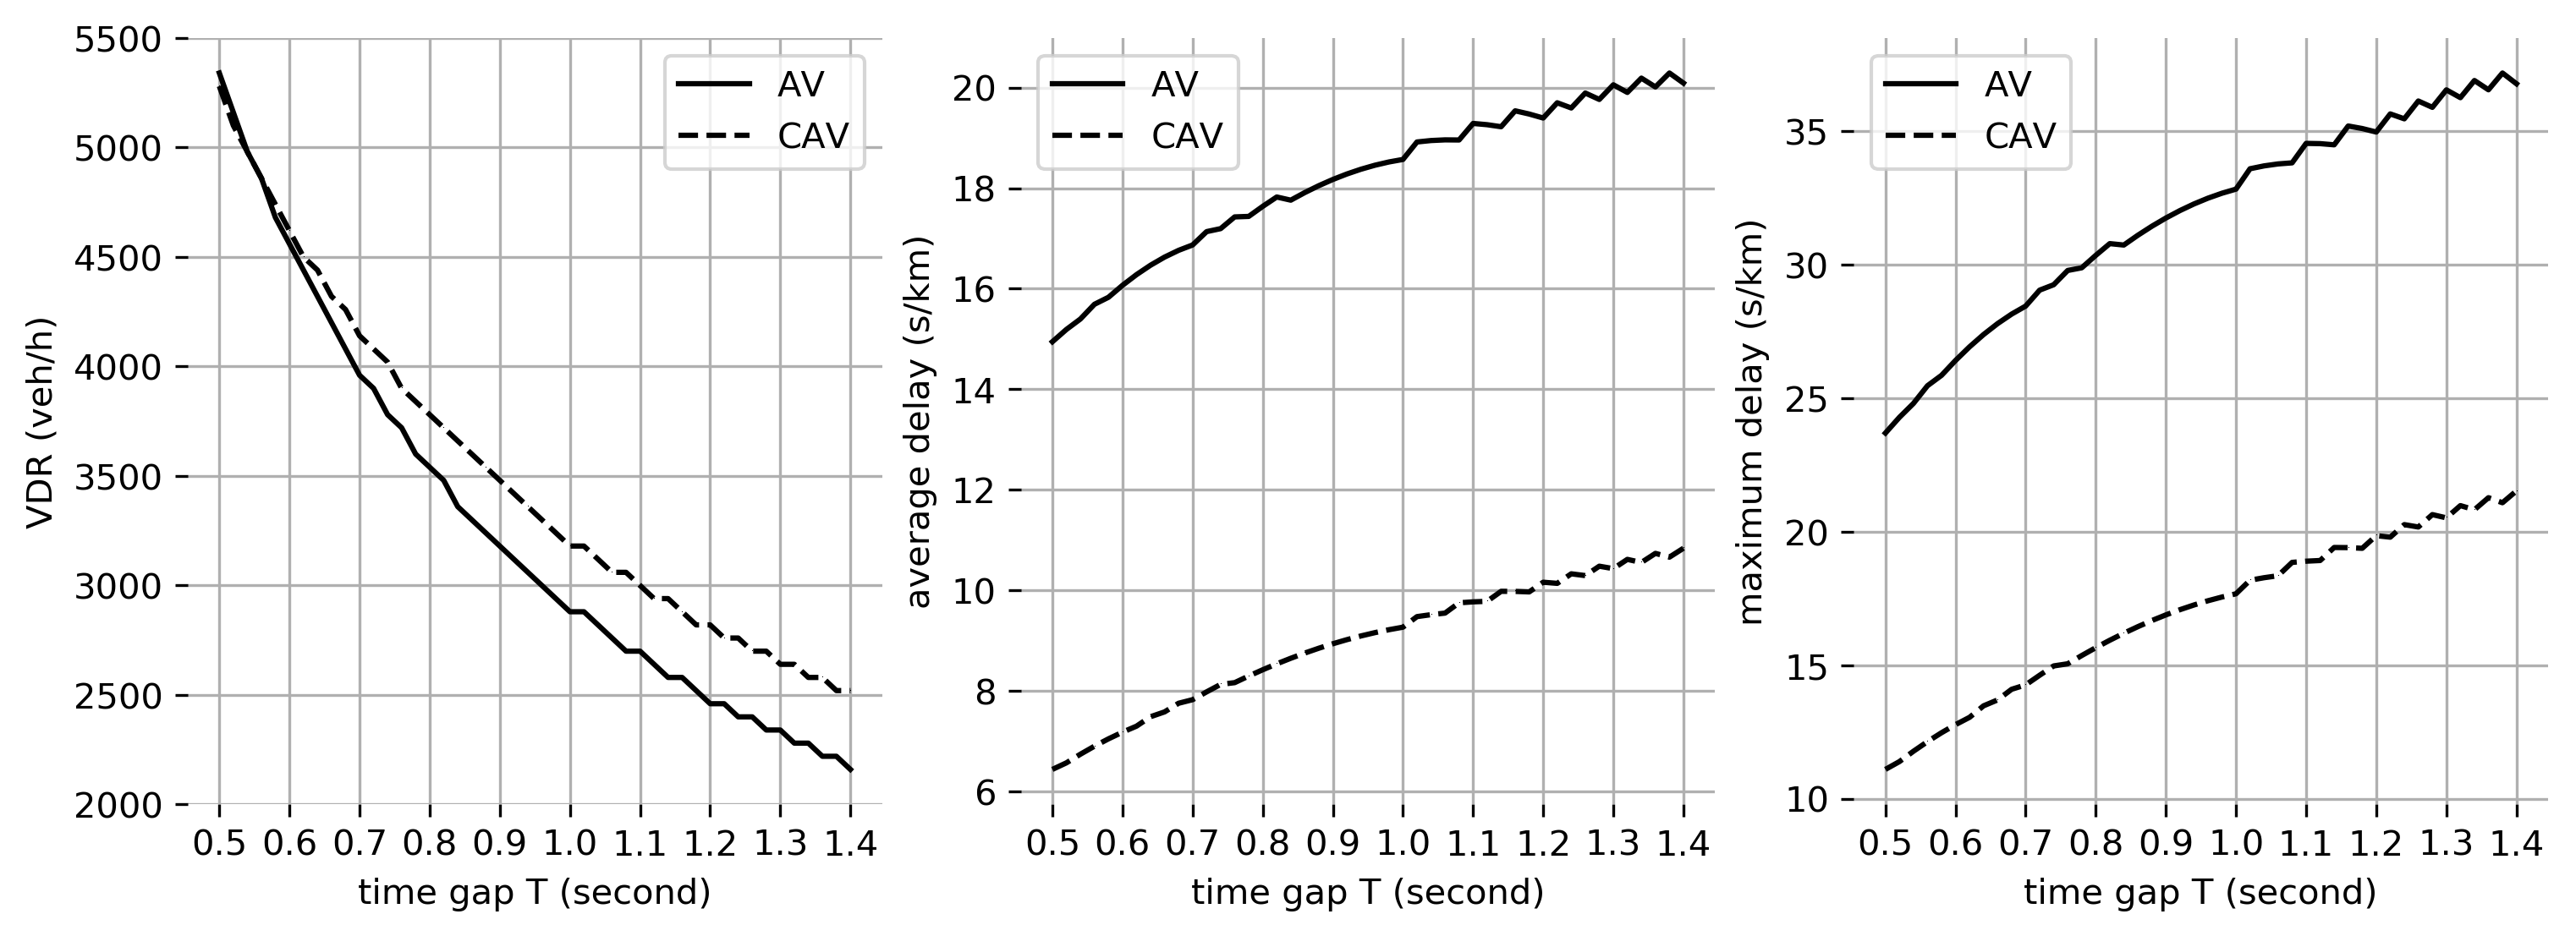

In [102]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.xlabel("time gap T (second)")
plt.ylabel("VDR (veh/h)")
# plt.title('(a)')
plt.xticks(np.arange(start_T, end_T+0.1, 0.1))
plt.plot(x_T_av, y_vdr_av, label = "AV")
plt.plot(x_T_cav, y_vdr_cav, label = "CAV")
plt.legend(title="")
plt.subplot(1,3,2)
plt.xticks(np.arange(start_T, end_T+0.1, 0.1))
plt.xlabel("time gap T (second)")
plt.ylabel("average delay (s/km)")
# plt.title('(b)')
plt.plot(x_T_av, y_avg_delay_av, label = "AV")
plt.plot(x_T_cav, y_avg_delay_cav, label = "CAV")
plt.legend(title="")
plt.subplot(1,3,3)
plt.xticks(np.arange(start_T, end_T+0.1, 0.1))
plt.xlabel("time gap T (second)")
plt.ylabel("maximum delay (s/km)")
# plt.title('(c)')

plt.plot(x_T_av, y_high_delay_av, label = "AV")
plt.plot(x_T_cav, y_high_delay_cav, label = "CAV")
plt.legend(title="")

-1.1627906976744187 16.666666666666664
41.44682829397047 53.14811601806316


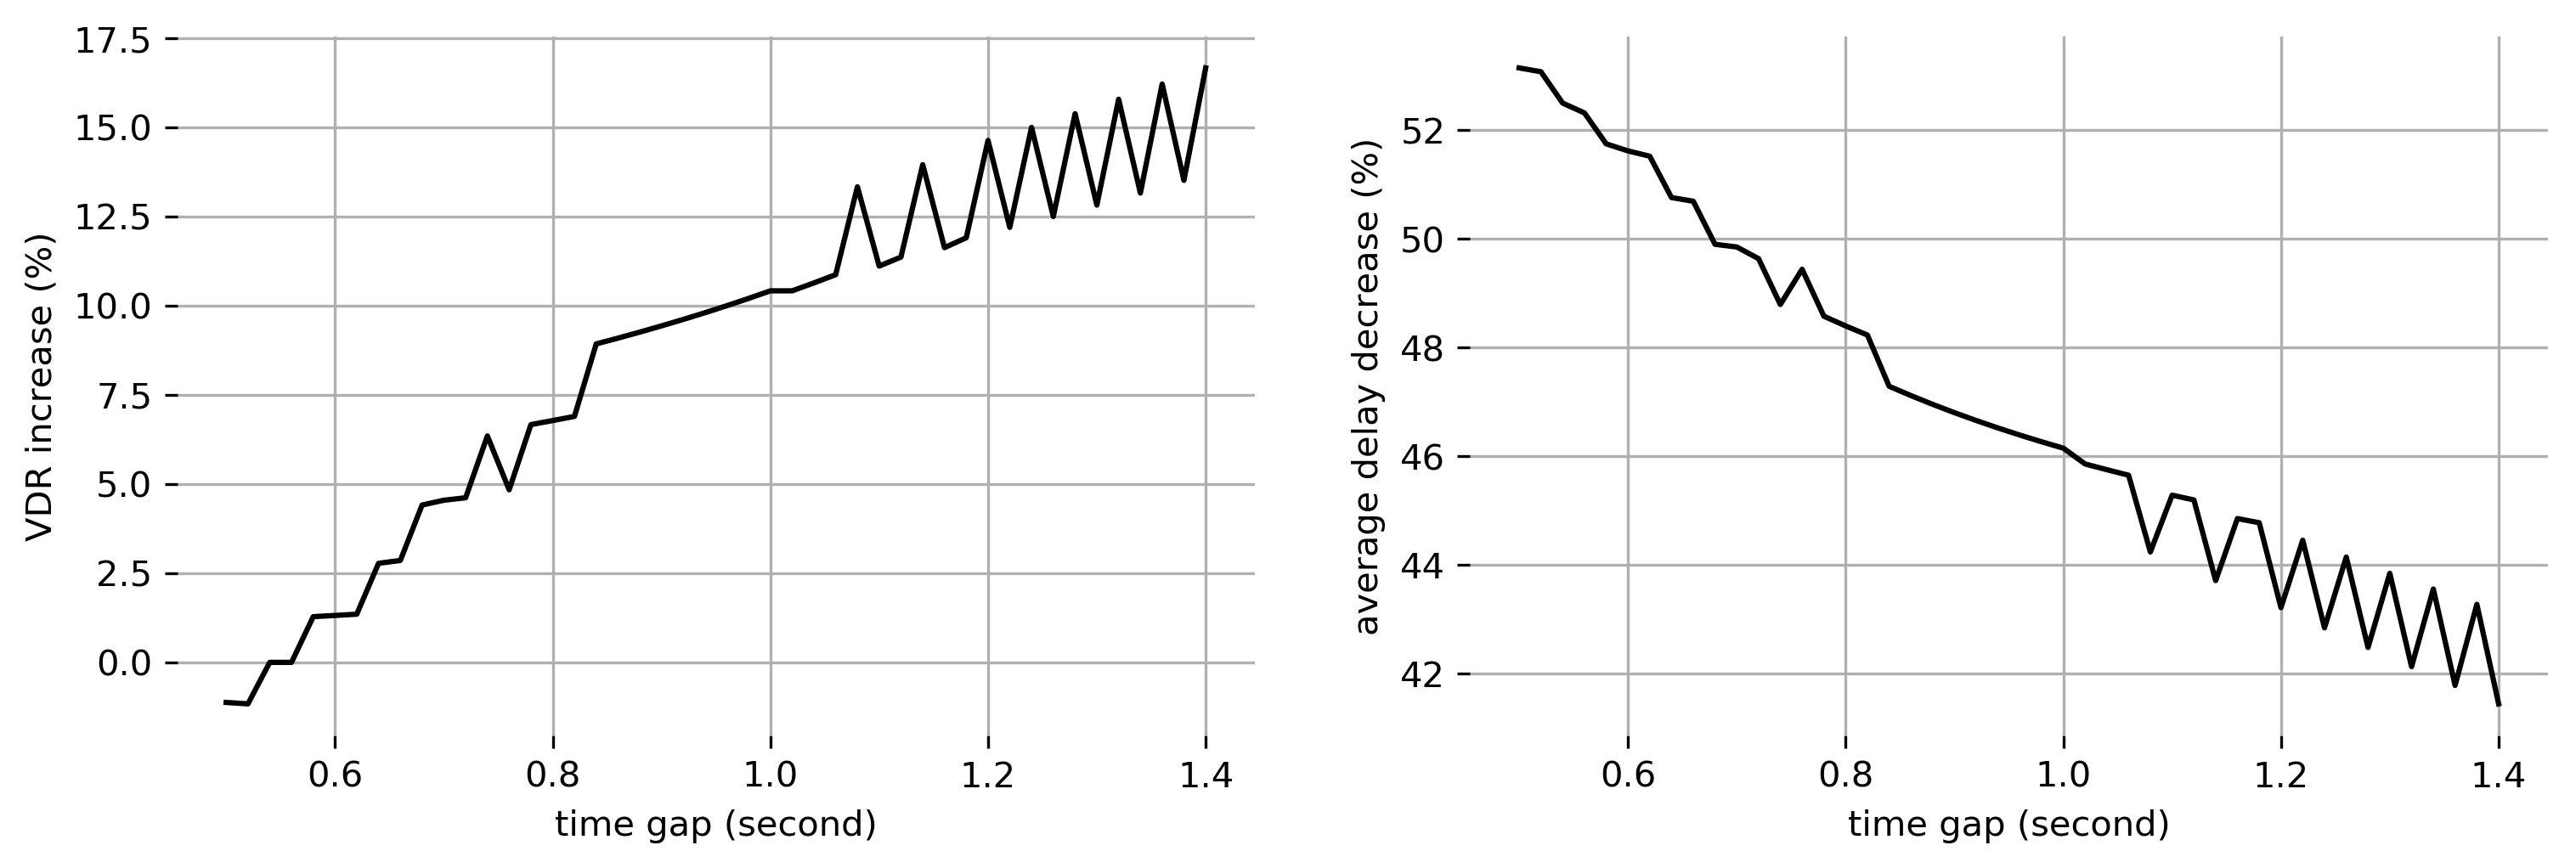

In [103]:
def calculate_per_diff(la,lb):
    la = np.array(la)
    lb = np.array(lb)
    return (lb-la)/la

vdr_per = calculate_per_diff(y_vdr_av, y_vdr_cav) * 100
hdelay_per = -calculate_per_diff(y_high_delay_av, y_high_delay_cav) * 100

printMaxMin(vdr_per,hdelay_per)

x_axis = x_T_cav
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.xlabel("time gap (second)")
plt.ylabel("VDR increase (%)")
plt.plot(x_axis, vdr_per, label = "VDR")
plt.subplot(2,2,2)
plt.xlabel("time gap (second)")
plt.ylabel("average delay decrease (%)")
plt.plot(x_axis, hdelay_per, label = "max delay")

In [104]:
y_vdr_cav[0], y_vdr_cav[-1]

(5280.0, 2520.0)

In [105]:
vdr_per

array([-1.12359551, -1.1627907 ,  0.        ,  0.        ,  1.28205128,
        1.31578947,  1.35135135,  2.77777778,  2.85714286,  4.41176471,
        4.54545455,  4.61538462,  6.34920635,  4.83870968,  6.66666667,
        6.77966102,  6.89655172,  8.92857143,  9.09090909,  9.25925926,
        9.43396226,  9.61538462,  9.80392157, 10.        , 10.20408163,
       10.41666667, 10.41666667, 10.63829787, 10.86956522, 13.33333333,
       11.11111111, 11.36363636, 13.95348837, 11.62790698, 11.9047619 ,
       14.63414634, 12.19512195, 15.        , 12.5       , 15.38461538,
       12.82051282, 15.78947368, 13.15789474, 16.21621622, 13.51351351,
       16.66666667])

In [106]:
y_high_delay_av[-1], y_high_delay_cav[-1]

(36.781189299914516, 21.536552926298707)

In [107]:
(2520-2160)/2160

0.16666666666666666

-60.0 360.0
12.59681780138166 16.092755571903815


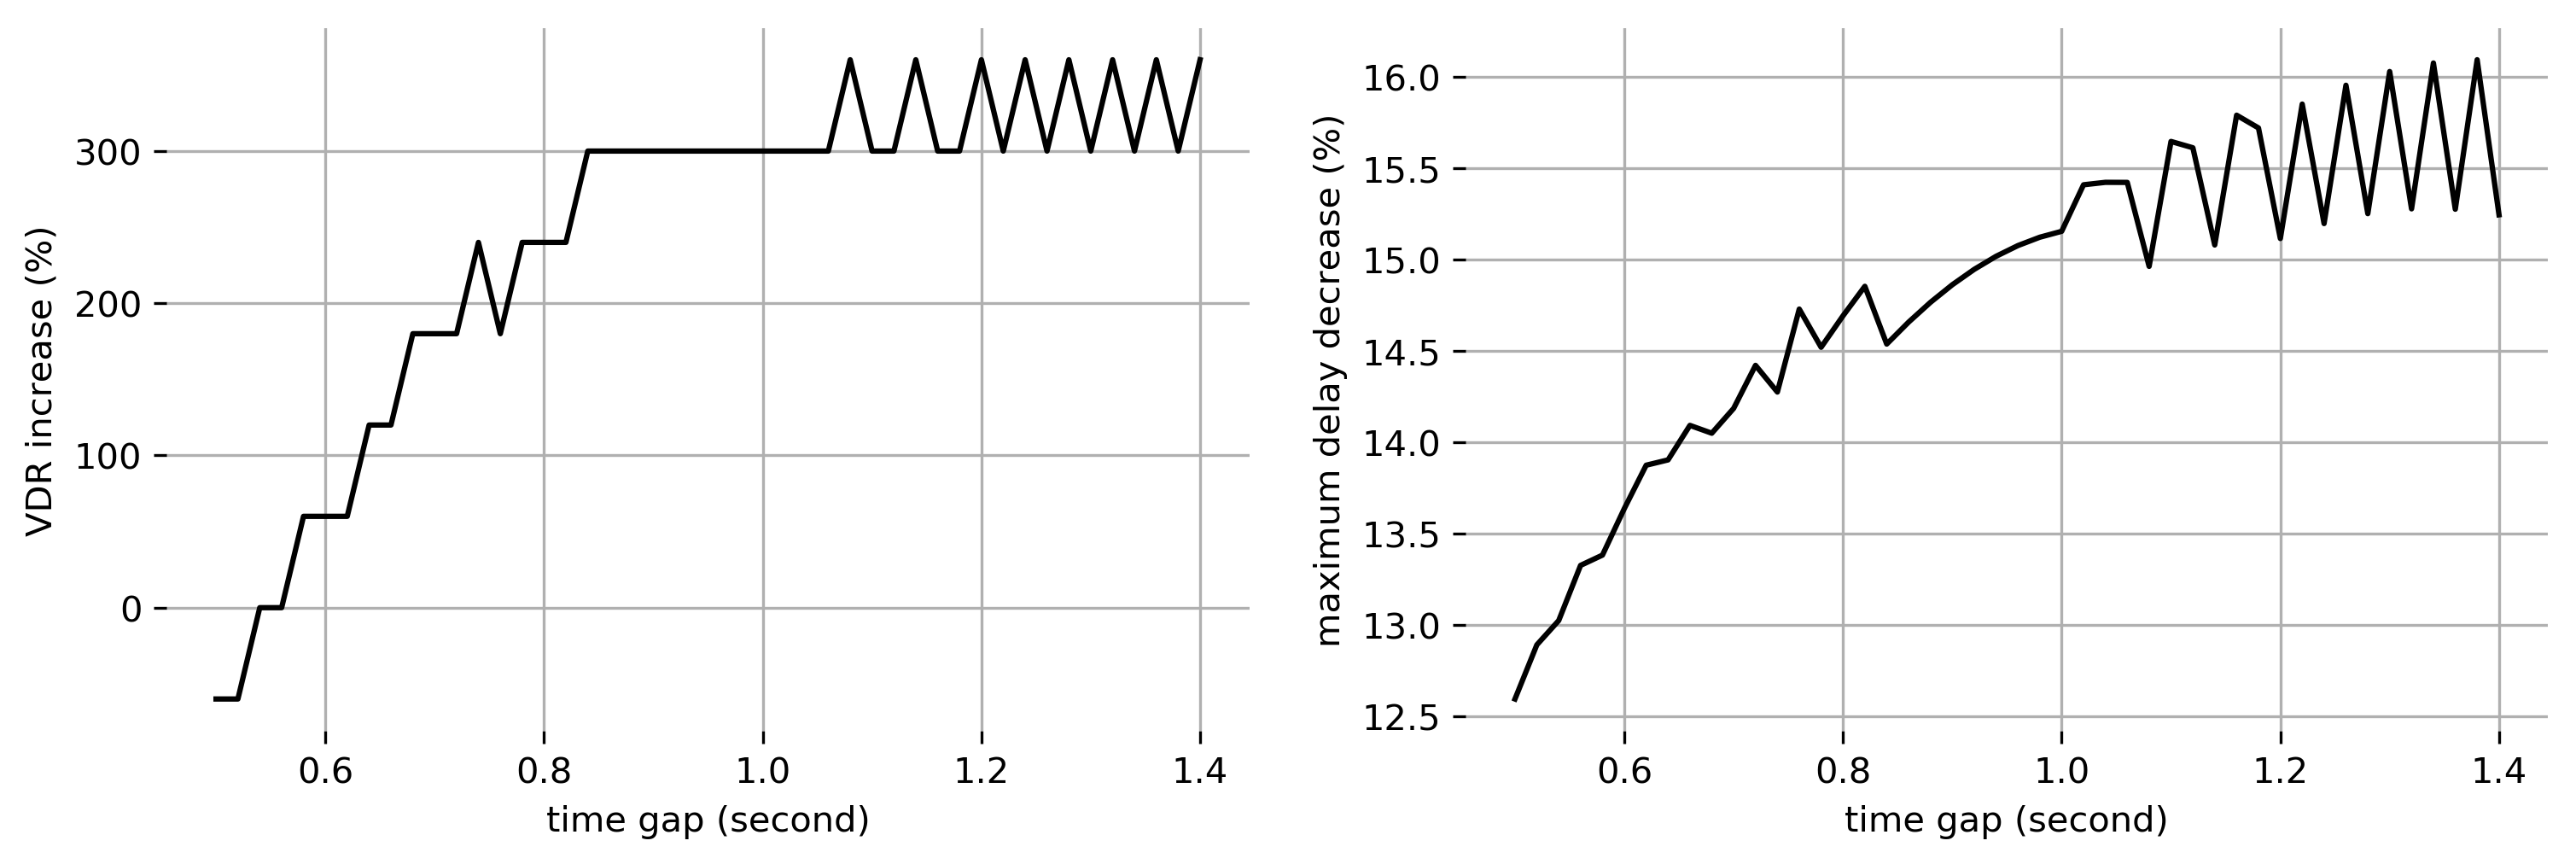

In [108]:
def calculate_per_diff(la,lb):
    la = np.array(la)
    lb = np.array(lb)
    return (lb-la)

vdr_per = calculate_per_diff(y_vdr_av, y_vdr_cav)
hdelay_per = -calculate_per_diff(y_high_delay_av, y_high_delay_cav)

printMaxMin(vdr_per,hdelay_per)

x_axis = x_T_cav
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.xlabel("time gap (second)")
plt.ylabel("VDR increase (%)")
plt.plot(x_axis, vdr_per, label = "VDR")
plt.subplot(2,2,2)
plt.xlabel("time gap (second)")
plt.ylabel("maximum delay decrease (%)")
plt.plot(x_axis, hdelay_per, label = "max delay")